In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras

In questo esempio vedremo come caricare un dataset utilizzando la funzione `image_dataset_from_directory`. Per farlo, utilizzeremo il dataset *Dogs vs. Cats*, disponibile a [questo indirizzo](https://www.kaggle.com/competitions/dogs-vs-cats/overview) (o, alternativamente, tra i materiali del corso).

In questo caso, la dimensione dell'immagine sarà $150 \times 150$ pixel.

In [2]:
IMG_SIZE = (150, 150)

train_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='training')

val_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='validation')

Found 25000 files belonging to 2 classes.
Using 17500 files for training.
Found 25000 files belonging to 2 classes.
Using 7500 files for validation.


Mostriamo adesso le prime nove immagini del dataset. Notiamo che, a differenza del caso precedente, dobbiamo utilizzare un ciclo annidato.

Questo è legato al fatto che la funzione `take()` applicata al nostro dataset estrae un *batch* di dati, sul quale dovremo a sua volta iterare. Da notare inoltre come sia necessario andare a convertire ciascuna immagine in un array NumPy di interi.

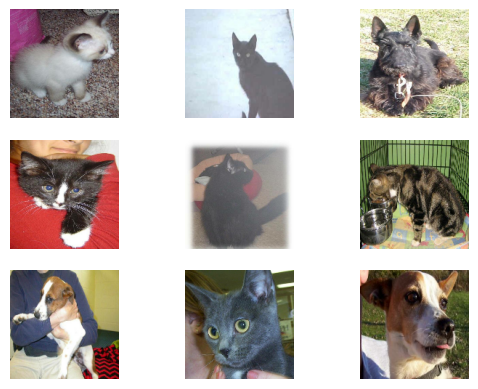

In [3]:
plt.figure()

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

Addestriamo la nostra rete e valutiamo i risultati ottenuti.

In [4]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()
    ]
)

model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1094/1094 [==============================] - 83s 75ms/step - loss: 54869276653256704.0000 - binary_accuracy: 0.4985 - precision: 0.4957 - recall: 0.4077 - val_loss: 0.6932 - val_binary_accuracy: 0.4952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
1094/1094 [==============================] - 88s 80ms/step - loss: 0.6932 - binary_accuracy: 0.4991 - precision: 0.4951 - recall: 0.3027 - val_loss: 0.6932 - val_binary_accuracy: 0.4952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
1094/1094 [==============================] - 97s 89ms/step - loss: 0.6932 - binary_accuracy: 0.4981 - precision: 0.4932 - recall: 0.2934 - val_loss: 0.6932 - val_binary_accuracy: 0.4952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
1094/1094 [==============================] - 102s 93ms/step - loss: 0.6932 - binary_accuracy: 0.4968 - precision: 0.4919 - recall: 0.3225 - val_loss: 0.6932 - val_binary_accuracy: 0.4952 - val_precision: 0.0000e+00 - val_re